<a href="https://colab.research.google.com/github/Aishwaryavemuri/11239A099_DAA_LAB/blob/main/11239A099_EXP6A_MST_PRIM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Minimum Spanning Tree: [(0, 1, 10), (0, 2, 6), (0, 3, 5), (3, 1, 15), (3, 2, 4)]
Total Weight of MST: 19


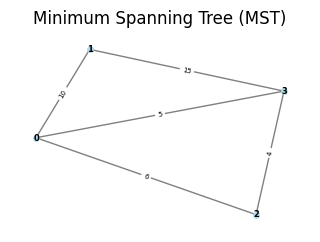

In [1]:
import heapq
import networkx as nx
import matplotlib.pyplot as plt

def prim(vertices, edges):
    adj = {i: [] for i in range(vertices)}
    for u, v, weight in edges:
        adj[u].append((v, weight))
        adj[v].append((u, weight))
    pq = [(0, 0)]
    visited = [False] * vertices
    mst = []
    total_weight = 0
    while pq:
        weight, u = heapq.heappop(pq)
        if visited[u]:
            continue
        visited[u] = True
        total_weight += weight
        for v, w in adj[u]:
            if not visited[v]:
                heapq.heappush(pq, (w, v))
                mst.append((u, v, w))
    return mst, total_weight

# Input graph
vertices = 4
edges = [
    (0, 1, 10),
    (0, 2, 6),
    (0, 3, 5),
    (1, 3, 15),
    (2, 3, 4)
]

# Run Prim's algorithm
mst, total_weight = prim(vertices, edges)

# Print MST and total weight
print("Minimum Spanning Tree:", mst)
print("Total Weight of MST:", total_weight)

# Visualization using networkx and matplotlib
G = nx.Graph()
# Add edges from MST
for u, v, weight in mst:
    G.add_edge(u, v, weight=weight)

# Draw the graph
pos = nx.spring_layout(G)  # Positions for all nodes
labels = nx.get_edge_attributes(G, 'weight')  # Edge weights for labels
plt.figure(figsize=(3, 2))
nx.draw(G, pos, with_labels=True, node_size=15, node_color='lightblue', font_size=6, font_weight='bold', edge_color='gray')
nx.draw_networkx_edge_labels(G, pos, edge_labels=labels, font_size=5)

plt.title("Minimum Spanning Tree (MST)")
plt.show()
